## Importing required libiraries

Pandas, pyplot from matplotlib and seaborn

i use the plotting capabilities of these 3 libiraries interchagably depending on what's appropriate for the task

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## loading the file from the downloads directory
the dataset was obtained from kaggle, the source of the data is unknown but its safe to say thats it doesn't contain any real data


In [3]:
df = pd.read_csv(r'C:\Users\F\Downloads\dataset_.csv')

## taking a sample of the data

In [4]:
df.sample(10)

,age,sex,bmi,children,smoker,region,medical charges
127,52,female,37.400,0,no,southwest,9634.53800
1071,63,male,31.445,0,no,northeast,13974.45555
999,36,female,26.885,0,no,northwest,5267.81815
95,28,female,37.620,1,no,southeast,3766.88380
802,21,male,22.300,1,no,southwest,2103.08000
1311,33,female,26.695,0,no,northwest,4571.41305
837,56,female,28.310,0,no,northeast,11657.71890
1283,18,male,30.030,1,no,southeast,1720.35370
250,18,male,17.290,2,yes,northeast,12829.45510
1085,39,female,18.300,5,yes,southwest,19023.26000


## validating the data
there are no missing data and all columns have appropriate data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data seems to be in good shape, however the number of children is a bit low considering the median age is 39

mean and median values of age are the same, which tells me that the the age has a uniform or symetrical distubution

In [6]:
df.describe()

,age,bmi,children,medical charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.age.median()

np.float64(39.0)

## Exploring the age
aside from the anomaly of the ages of 18,19 and 64 the ages seem to be uniform and have no apperant trends



<Axes: ylabel='Frequency'>

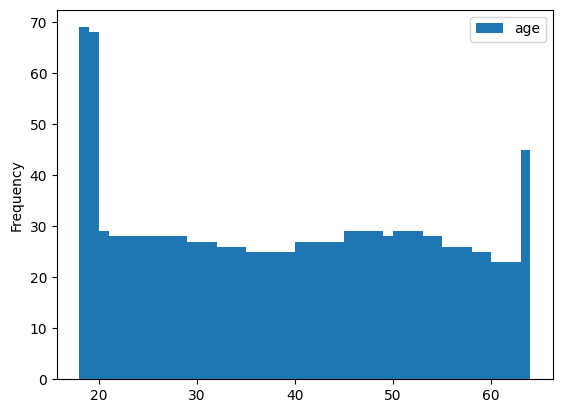

In [11]:
df.plot.hist(y = 'age', bins = 46)

## using a pair plot to easily find data to explore further
Age and BMI seem to be the most intresting graphs

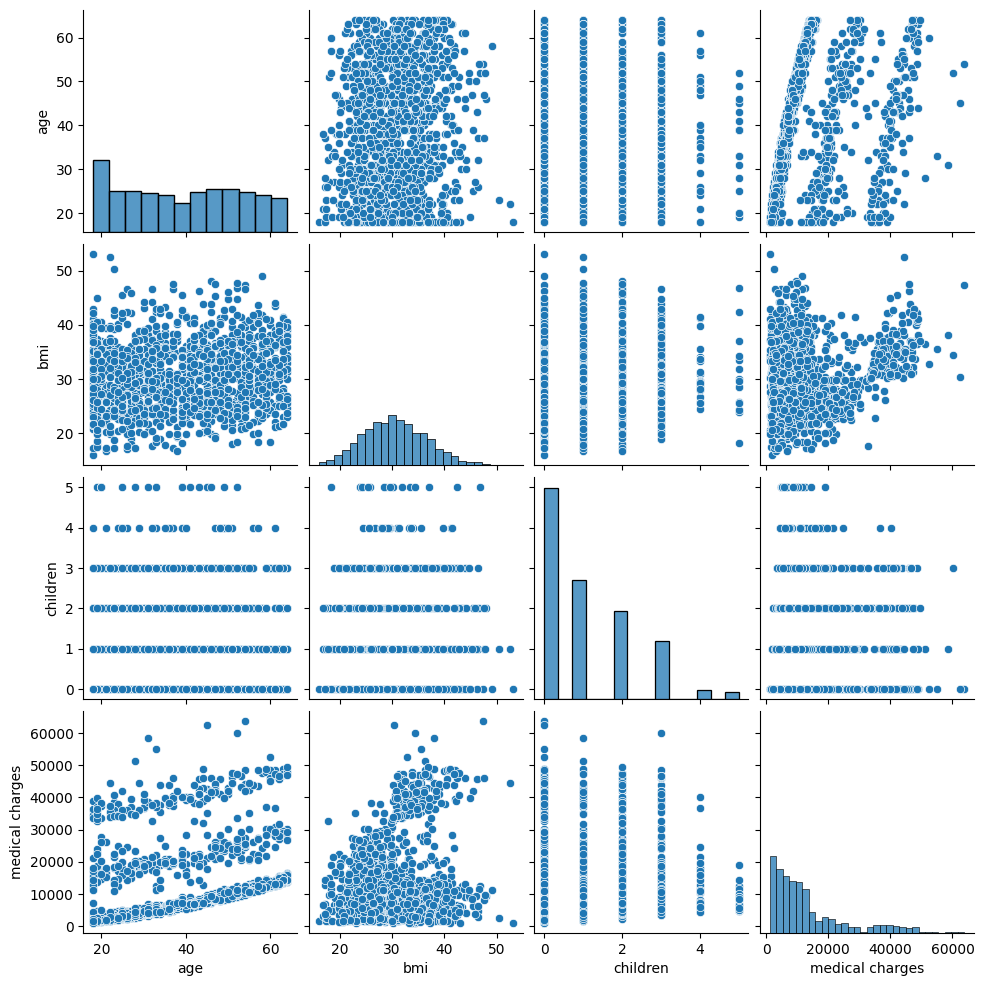

In [8]:
sns.pairplot(data=df)

## exploring individual graphs - Age

Medical charges have a positive correlation with age,
there are 3 distinct groups of medical charges, those could be due to the nature of the medical situation, e.g. medical checkup vs surgery

there is slight positive correlation between age and bmi

there is almost no difference between a smoker and non-smoker when it comes to bmi

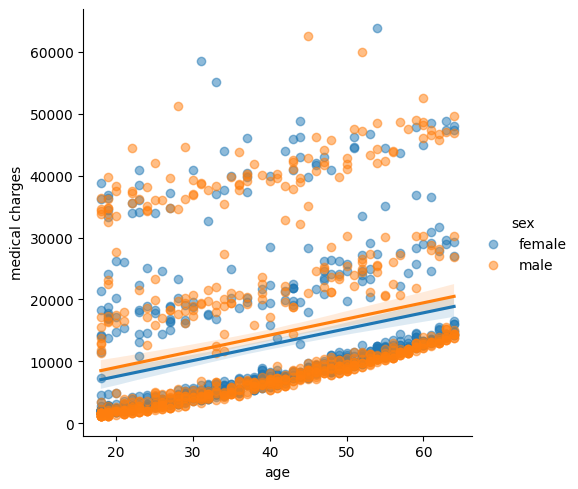

In [9]:
sns.lmplot(x='age', y='medical charges', hue='sex', data=df, scatter_kws = {'alpha':0.5})

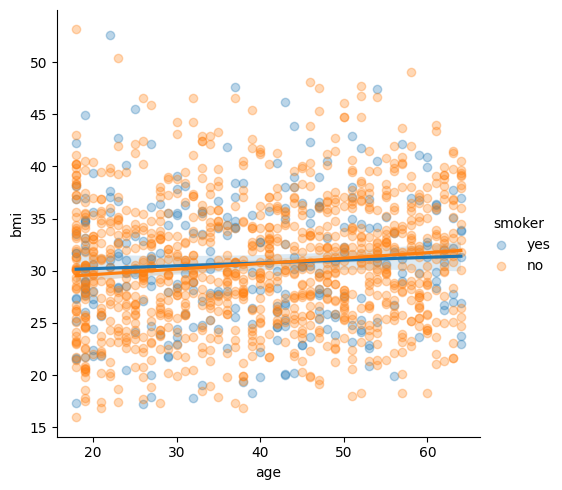

In [24]:
sns.lmplot(x = 'age',y = 'bmi' , hue = 'smoker' , data = df,  scatter_kws={'alpha':0.3})

## BMI

there's a positive correlation between BMI and medical charges
this trend is more apperant with men

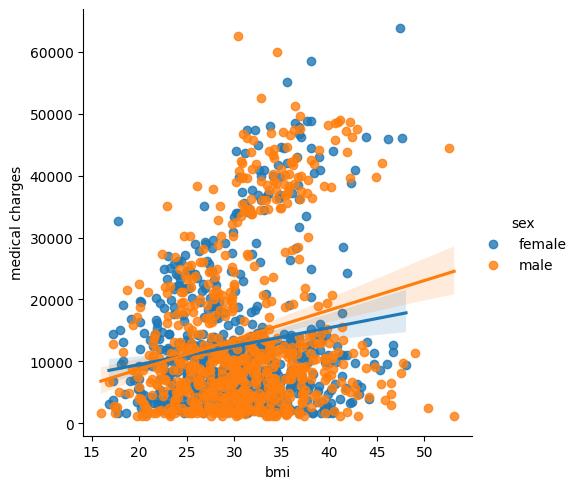

In [10]:
sns.lmplot(data=df,x='bmi',y='medical charges', hue = 'sex')

## Children

it might be hard to see on this graph but the the trendline represents the median, it may look inaccurate but its due to the fact that there are
magnitudes more people with less children

the graph shows that the medical expenses increase by the amount of children someone has, and (surprisingly) more for men

there seems to be slight negative correlation with the number of children and BMI

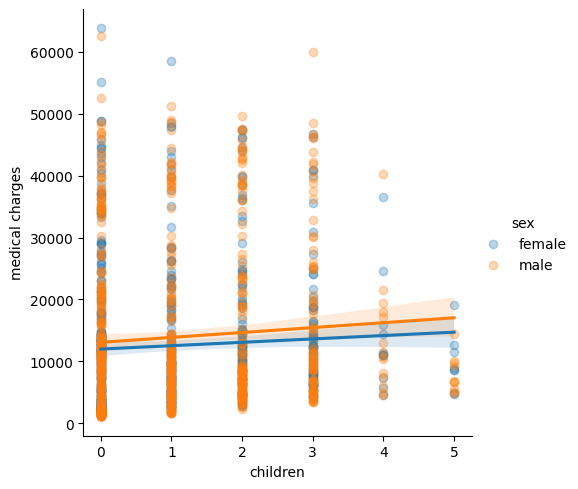

In [19]:
sns.lmplot(x = 'children',y = 'medical charges' , hue = 'sex' , data = df,  scatter_kws={'alpha':0.3})

<Axes: xlabel='children', ylabel='bmi'>

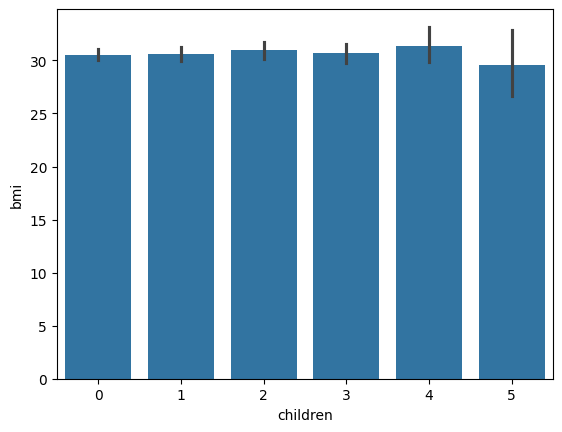

In [18]:
sns.barplot(data=df, x ='children',y='bmi')

## BMI and smoking

the highlighted range is the range for the normal BMI of a person, meaning most people in this dataset are overweight

there doesn't seem to be a corrlation between bmi and smoking


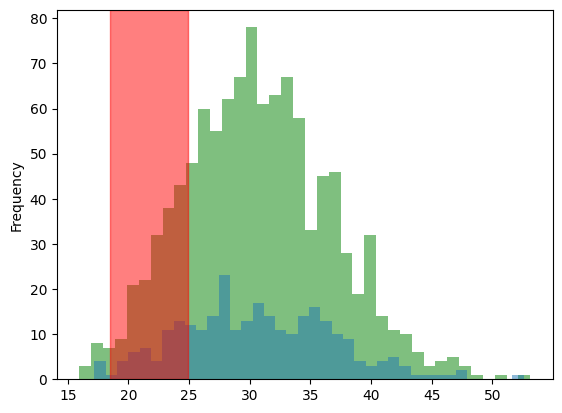

In [22]:
ax = df['bmi'][df['smoker'] == 'no'].plot.hist(bins = 38, alpha = 0.5, color = 'green')
df['bmi'][df['smoker'] == 'yes'].plot.hist(bins = 38, alpha = 0.5, ax=ax)
plt.axvspan(18.5 , 24.9 , color='red', alpha=0.5)

## Sex and Smoking and regioin

there is no correlation between the smoking and sex, region and medical chargers

<Axes: xlabel='sex'>

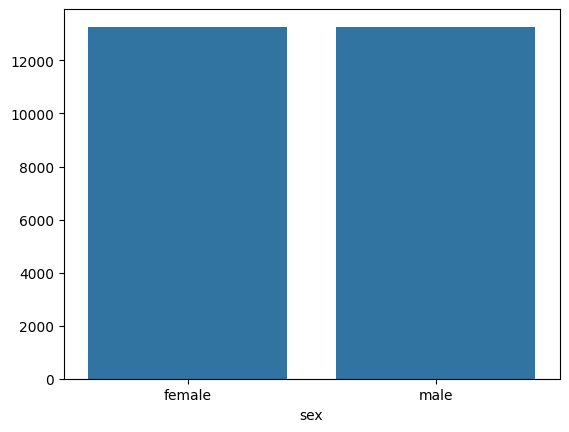

In [20]:
sns.barplot(data=df, x ='sex',y= (df['medical charges'].mean()))

<Axes: xlabel='smoker'>

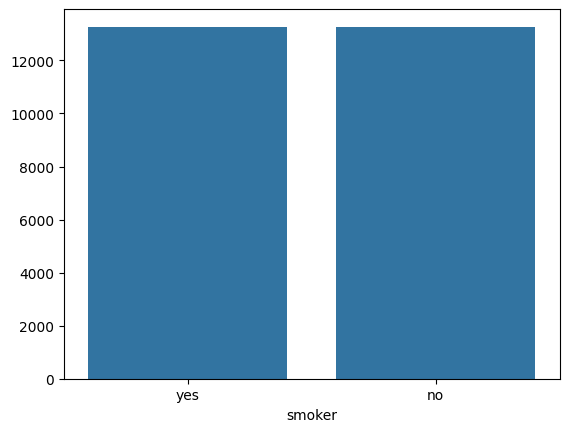

In [21]:
sns.barplot(data=df, x ='smoker',y= (df['medical charges'].mean()))

<Axes: xlabel='region'>

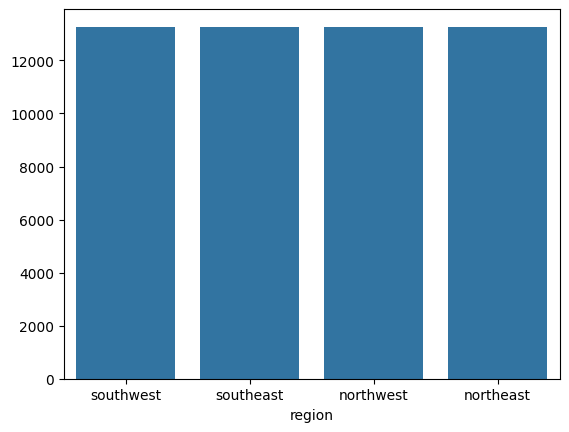

In [23]:
sns.barplot( data=df,x = 'region' ,y= ((df['medical charges'].mean())))

## Conclusion

Exploring the data tells me a plethera of things


-Most of the people in this dataset are overweight

-The people in this dataset have a surprisingly small amount of children (the median is 1 child)

-the biggest indicators of the medical charges are 
   1. bmi
   2. age
   3. children

